In [39]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
import skimage
from skimage.morphology import skeletonize
from skimage.util import invert
import warnings
warnings.filterwarnings("ignore")

In [40]:
def plot_outline(cropped: np.ndarray, outline: np.ndarray, size: int = 6) -> None:
    """
    Plot an outline of the shape of the snake.

    Parameters
    ----------
    cropped : np.ndarray
        Cropped image of the snake.
    outline : np.ndarray
        A 2D array giving pixel values for an outline.

    Returns
    -------
    """
    plt.figure(figsize=(size, size))
    plt.imshow(cropped, cmap="gray")
    plt.scatter(outline[:, 0], outline[:, 1], s=1, color="red")
    plt.show()

In [41]:
front = np.load("front.npy")
bottom = np.load("bottom.npy")
img = np.load("samp_img.npy")

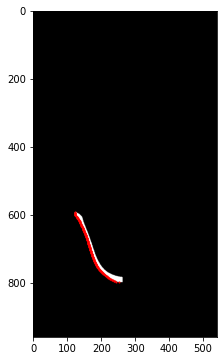

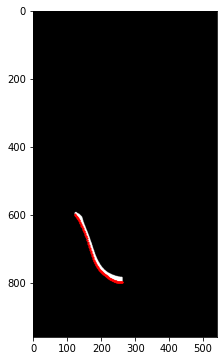

In [42]:
plot_outline(img, front)
plot_outline(img, bottom)

In [43]:
np.amax(bottom[:, 0])

262

In [64]:
bot_cols = bottom[:, 0]
extra_cols = list(np.where(bot_cols > np.amax(front[:, 0]))[0])
extra_bit = bottom[extra_cols]
hybrid = np.vstack((front, extra_bit))

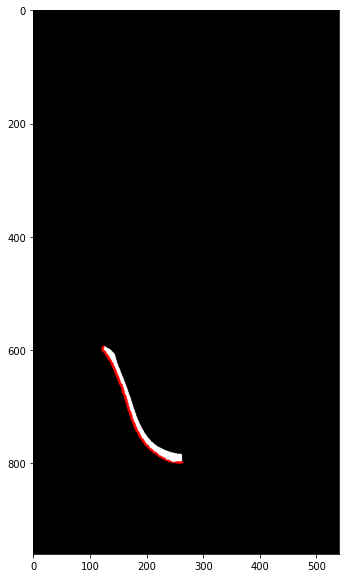

In [67]:
plot_outline(img, hybrid, size=10)

In [68]:
hybrid

array([[123, 593],
       [123, 594],
       [122, 595],
       [122, 596],
       [122, 597],
       [122, 598],
       [122, 599],
       [123, 600],
       [124, 601],
       [124, 602],
       [125, 603],
       [126, 604],
       [127, 605],
       [128, 606],
       [128, 607],
       [129, 608],
       [130, 609],
       [130, 610],
       [131, 611],
       [132, 612],
       [132, 613],
       [133, 614],
       [134, 615],
       [134, 616],
       [135, 617],
       [136, 618],
       [136, 619],
       [137, 620],
       [137, 621],
       [137, 622],
       [138, 623],
       [138, 624],
       [139, 625],
       [139, 626],
       [140, 627],
       [140, 628],
       [141, 629],
       [141, 630],
       [142, 631],
       [142, 632],
       [143, 633],
       [143, 634],
       [144, 635],
       [144, 636],
       [144, 637],
       [145, 638],
       [145, 639],
       [146, 640],
       [146, 641],
       [146, 642],
       [146, 643],
       [147, 644],
       [147,

- The first column of the outline is the column index aka the x coordinate of a point

- The second column of the outline is the row index aka the y coordinate of a point

When we create the `front` outline we sweep over rows of the image and find column values that are non zero. That means in `front` we can have repeat column values aka repeat x coordinates.

When we create the `bottom` outline we sweep over columns of the image and find row row values that are non zero. That means `bottom` can have repeat row values aka repeat y coordinates.

What we want to do is combine the two outlines so that one fills in the gaps of the other. For example, if we have a front outline that does not actually cover the whole snake, we want to be able to take the bottom outline and supplement the top outline.

The issue is the repeat values are in a different place for each outline. ANd just a simple meshing of values does not work.
